In [39]:
train=pd.read_csv('/kaggle/input/fashion/fashion-mnist_train.csv')
test=pd.read_csv('/kaggle/input/fashion/fashion-mnist_test.csv')

train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
test=np.array(test)
train=np.array(train)
train


array([[2, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       ...,
       [8, 0, 0, ..., 0, 0, 0],
       [8, 0, 0, ..., 0, 0, 0],
       [7, 0, 0, ..., 0, 0, 0]])

In [41]:
m, n = train.shape #m: rows, n:no. of features+1 cuz label column
#np.random.shuffle(train)
j,k=test.shape

In [42]:
data_dev = train[0:1000].T #each column becomes an example instead of each row
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

In [43]:
data_test=test.T
Y_test=data_test[0]
X_test=data_test[1:k]
X_test=X_test / 255

In [44]:
data_train = train[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [45]:
Y_train


array([8, 0, 6, ..., 8, 8, 7])

In [46]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    loss=[]
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
            loss.append(compute_loss(one_hot(Y), A2))
    return W1, b1, W2, b2, loss

In [47]:
def compute_loss(y_true, y_pred):
    loss = -np.sum(y_true * np.log(y_pred + 1e-10)) / len(y_true)
    return loss

In [48]:
def get_predictions(A2):
    return np.argmax(A2, 0)

In [49]:
W1, b1, W2, b2, loss = gradient_descent(X_train, Y_train, 0.16, 500)

Iteration:  0
[2 2 2 ... 2 2 2] [8 0 6 ... 8 8 7]
0.11623728813559323
Iteration:  10
[5 6 0 ... 5 9 5] [8 0 6 ... 8 8 7]
0.2541525423728814
Iteration:  20
[5 6 7 ... 5 9 7] [8 0 6 ... 8 8 7]
0.3005254237288136
Iteration:  30
[7 6 7 ... 5 8 7] [8 0 6 ... 8 8 7]
0.3878813559322034
Iteration:  40
[7 6 0 ... 8 8 7] [8 0 6 ... 8 8 7]
0.47120338983050847
Iteration:  50
[7 2 0 ... 4 8 7] [8 0 6 ... 8 8 7]
0.5170338983050847
Iteration:  60
[5 2 0 ... 4 8 7] [8 0 6 ... 8 8 7]
0.5744576271186441
Iteration:  70
[5 2 0 ... 8 8 7] [8 0 6 ... 8 8 7]
0.6098813559322034
Iteration:  80
[5 2 0 ... 8 8 7] [8 0 6 ... 8 8 7]
0.6329830508474577
Iteration:  90
[5 4 0 ... 8 8 7] [8 0 6 ... 8 8 7]
0.6219830508474576
Iteration:  100
[5 4 0 ... 8 8 7] [8 0 6 ... 8 8 7]
0.6354237288135594
Iteration:  110
[5 4 0 ... 8 8 7] [8 0 6 ... 8 8 7]
0.6461016949152543
Iteration:  120
[5 4 0 ... 8 8 7] [8 0 6 ... 8 8 7]
0.6563728813559322
Iteration:  130
[5 6 0 ... 8 8 7] [8 0 6 ... 8 8 7]
0.6661864406779661
Iteration:  140

[30029.978521468234, 12637.672061678255, 11651.280893174691, 10718.858938715457, 9429.95032151211, 8317.419470750305, 7062.337007308134, 6429.877300874631, 6063.682941833526, 6446.197639804285, 5973.279018543035, 5754.705764046289, 5585.250350261692, 5435.730119966429, 5298.043505969781, 5171.586511707457, 5054.585700665067, 4946.369180924632, 4849.8524110440385, 4760.46966694272, 4681.197216150862, 4610.091065157585, 4542.746072505204, 4482.415671098677, 4424.813084890091, 4372.326930551431, 4322.709832604459, 4275.014349210503, 4230.5324150525, 4188.4605726926775, 4148.599916229085, 4110.833049922574, 4075.6371587460853, 4042.183031245751, 4010.673983286648, 3980.951894268436, 3952.0991856873466, 3924.778048716494, 3899.6071306670906, 3875.37171431944, 3851.33786573681, 3828.906792266595, 3806.29479153469, 3784.8404261339283, 3764.914253974815, 3745.597504132861, 3727.064752209586, 3708.5901974056587, 3690.2789814231437, 3672.1107714091254]


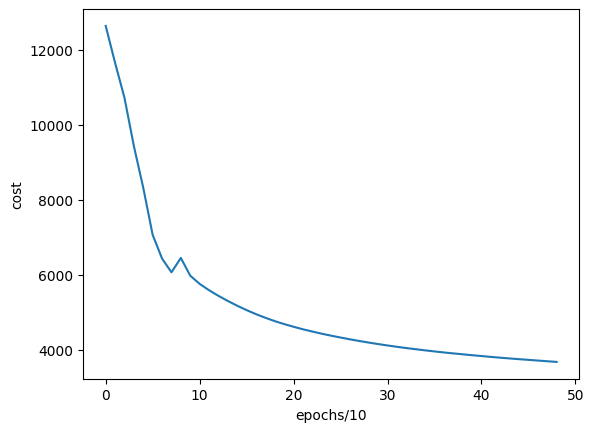

In [50]:
print(loss)
loss=loss[1:]
plt.plot(range(len(loss)),loss)
plt.xlabel('epochs/10')
plt.ylabel('cost')
z1,a1,z2,a2=forward_prop(W1, b1, W2, b2, X_dev)

In [51]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions



In [52]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[8 7 6 0 3 4 4 5 4 8 0 1 9 6 2 6 9 3 3 3 8 7 4 4 3 4 4 6 7 1 5 0 5 6 4 7 3
 2 2 1 4 0 9 0 0 7 4 7 7 2 5 4 2 4 1 4 9 8 3 4 5 5 6 3 5 8 5 9 7 1 6 8 1 3
 2 8 3 4 4 5 3 2 4 8 1 2 7 3 4 4 0 5 0 1 7 3 5 8 4 3 8 5 0 5 3 0 8 5 4 1 0
 7 4 1 9 7 0 9 3 3 2 4 0 8 3 6 3 5 5 7 7 6 3 6 7 2 4 1 3 1 0 2 3 0 3 4 6 5
 9 3 7 2 6 8 8 0 7 5 6 1 9 5 0 7 0 8 5 7 7 8 0 9 4 6 0 4 1 9 6 7 2 3 0 0 8
 3 5 4 3 3 6 1 7 7 5 7 5 8 3 8 3 9 5 4 5 3 6 7 6 9 4 9 4 1 2 7 3 8 3 1 3 0
 0 0 3 2 8 7 2 8 6 2 4 2 8 7 0 1 3 9 5 1 7 0 5 7 7 2 3 8 4 4 5 9 3 4 9 1 1
 3 0 7 1 4 9 9 4 2 3 3 1 4 9 3 7 4 6 7 3 1 1 8 4 4 1 0 3 1 5 5 8 6 7 2 1 8
 4 5 5 6 3 8 9 9 4 9 0 3 4 6 1 7 8 2 7 3 0 3 5 9 6 3 7 3 2 0 6 4 5 8 2 9 8
 6 8 7 6 2 7 3 0 2 3 6 4 4 2 4 0 8 8 2 3 9 4 5 4 6 7 6 2 7 8 7 4 9 3 2 6 5
 4 1 1 3 5 0 3 5 6 7 7 3 5 8 9 1 0 9 6 4 5 2 3 8 6 0 7 9 3 5 0 0 4 7 4 8 2
 3 2 0 3 5 2 6 9 0 3 0 0 3 1 6 8 4 9 9 0 6 3 7 7 2 8 9 5 2 4 6 9 0 3 0 0 5
 4 9 5 8 7 5 8 4 8 0 3 0 2 0 0 9 2 4 1 0 3 7 0 3 9 9 8 7 0 9 0 1 7 8 3 3 7
 3 8 0 0 4 0 6 0 1 9 9 7 

0.774

In [53]:
test_predictions = make_predictions(X_test, W1, b1, W2, b2)
get_accuracy(test_predictions, Y_test)

[0 1 2 ... 8 6 2] [0 1 2 ... 8 8 1]


0.7755

In [55]:
from sklearn.metrics import f1_score
print(f1_score(test_predictions,Y_test,average='macro'))
print(f1_score(test_predictions,Y_test,average='micro'))

0.7707621229175169
0.7755


In [56]:
from sklearn.metrics import confusion_matrix

In [57]:
print(confusion_matrix(test_predictions,Y_test))

[[776   3  23  48   1   1 226   0   1   1]
 [  4 943   6  25   8   0   4   0   1   0]
 [ 14  20 530   5  41   1  63   0   6   0]
 [ 98  27   7 826  40   2  62   0  14   0]
 [  4   4 276  55 824   0 230   0  12   0]
 [  4   0   0   0   0 839   3  68  14  31]
 [ 83   3 143  33  78   1 379   0  39   0]
 [  1   0   0   0   0  90   0 814   7  44]
 [ 16   0  15   8   8  21  32   2 901   1]
 [  0   0   0   0   0  45   1 116   5 923]]
